<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

leer los dataframes


In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv("/datasets/instacart_orders.csv",sep=";")
df_products = pd.read_csv("/datasets/products.csv",sep=";")
df_order_products = pd.read_csv("/datasets/order_products.csv",sep=";")
df_aisles = pd.read_csv("/datasets/aisles.csv",sep=";")
df_departments = pd.read_csv("/datasets/departments.csv",sep=";")

In [3]:
# mostrar información del DataFrame
df_instacart_orders.info()
print(df_instacart_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [4]:
# mostrar información del DataFrame
df_products.info()
print(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# mostrar información del DataFrame
df_order_products.info()
print(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [6]:
# mostrar información del DataFrame
df_aisles.info()
print(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
# mostrar información del DataFrame
df_departments.info()
print(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
    
La razón del porque no te aparecen todos los valores del dataframe `df_order_products` es porque es contiene mucha información y pandas trata de optimizar esto al no mostrar los resultados, pero le podemos indicar que lo haga de cualquier manera utilizando el siguiente argumento:
    
```
df_order_products.info(show_counts=True)    
```    
</div>


## Conclusiones

comparten cosas como el product id


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

entender que contienen los dataframes

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(df_instacart_orders[(df_instacart_orders["order_dow"]==3) & (df_instacart_orders["order_hour_of_day"]==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_instacart_orders['order_id'].duplicated().sum())

0


al ver que se tenian datos duplicados los empece a eliminar

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print(df_products['product_id'].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products_names_upper = df_products['product_name'].str.upper()
print(df_products_names_upper.duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_products_names_upper.isna().sum())

1258


al revisar que no hay duplicados hay que revisar si hay faltantes


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos 
print(df_aisles['aisle'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

for column in df_order_products.columns:
    print(df_order_products[column].duplicated().sum())


4094961
4499434
4544942
4545005


se puede tener valores duplicados ocultos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().value_counts()

False    48436
True      1258
Name: product_name, dtype: int64

pueden haber valores ausentes

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products_ausente=df_products[df_products['product_name'].isna()]
print(df_products_ausente.shape)
df_products_ausente['aisle_id'].value_counts()

(1258, 4)


100    1258
Name: aisle_id, dtype: int64

todos se relacionaron con la id 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products_ausente['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

todos se relacionaron con la id 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_merge_aisle = df_products.merge(df_aisles, on='aisle_id', how='left')
df_merge_department = df_merge_aisle.merge(df_departments, on='department_id', how='left')
print(df_merge_department)
print(df_merge_department[df_merge_department['aisle_id']==100])
print(df_merge_department[df_merge_department['department_id']==21])

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id                       aisle     department  
0            61             19               cookies cakes 

estas 2 estan relaciondas en los valores faltantes.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown',inplace=True)
print(df_products['product_name'].isna().value_counts())

False    49694
Name: product_name, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_instacart_orders.isna().value_counts()

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              False                     450135
                                                               True                       28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart_orders_ausentes=df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
df_instacart_orders_ausentes['order_number'].value_counts()

1    28817
Name: order_number, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de revisar los datos y encontrar que no hay ausentes que no sean un primer pedido
</div>


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_products.isna().value_counts()

order_id  product_id  add_to_cart_order  reordered
False     False       False              False        4544171
                      True               False            836
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

df_order_products_ausentes=df_order_products[df_order_products['add_to_cart_order'].isna()]
print(df_order_products_ausentes)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

df_order_products_ausentes_conteo = df_order_products_ausentes.groupby('order_id')['product_id'].count()
print('el valor minimo es: ',df_order_products_ausentes_conteo.min())

print('una forma mas general de ver seria: ',df_order_products_ausentes_conteo.describe())

el valor minimo es:  1
una forma mas general de ver seria:  count    70.000000
mean     11.942857
std      12.898585
min       1.000000
25%       3.000000
50%       7.000000
75%      14.000000
max      63.000000
Name: product_id, dtype: float64


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [35]:
# Código del revisor
df_order_products[df_order_products['order_id'].isin(df_order_products_ausentes['order_id'])].groupby('order_id')['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products.fillna(999,inplace=True)
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype(int)
print(df_order_products)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


## Conclusiones

hay muchas cuestiones oculatas en los datos que tenemos que checar


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(df_instacart_orders['order_hour_of_day'].min(),df_instacart_orders['order_hour_of_day'].max())

0 23


In [37]:
print(df_instacart_orders['order_dow'].min(),df_instacart_orders['order_dow'].max())

0 6


Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

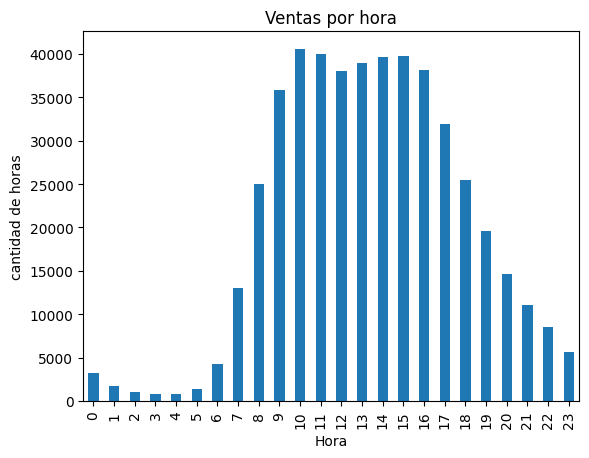

In [38]:
df_ordenes_por_hora=df_instacart_orders['order_hour_of_day'].value_counts().sort_index()


df_ordenes_por_hora.plot(kind='bar',title='Ventas por hora',xlabel='Hora',ylabel='cantidad de horas')
plt.show()



las mayores ventas se realizan entre las horeas 10 y 15

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

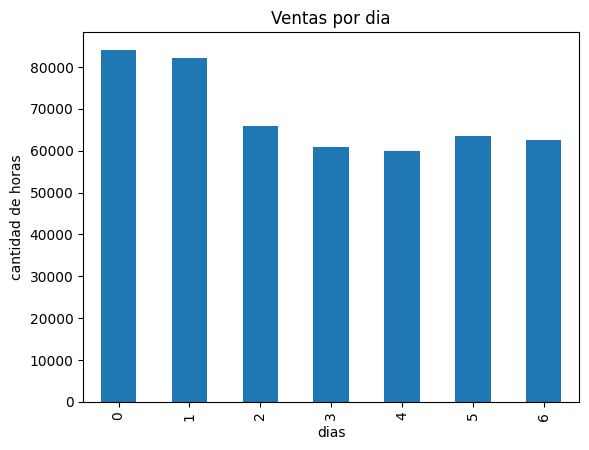

In [39]:
df_ordenes_por_semana=df_instacart_orders['order_dow'].value_counts().sort_index()


df_ordenes_por_semana.plot(kind='bar',title='Ventas por dia',xlabel='dias',ylabel='cantidad de horas')
plt.show()




el domingo y lunes son los dias de mayor venta

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

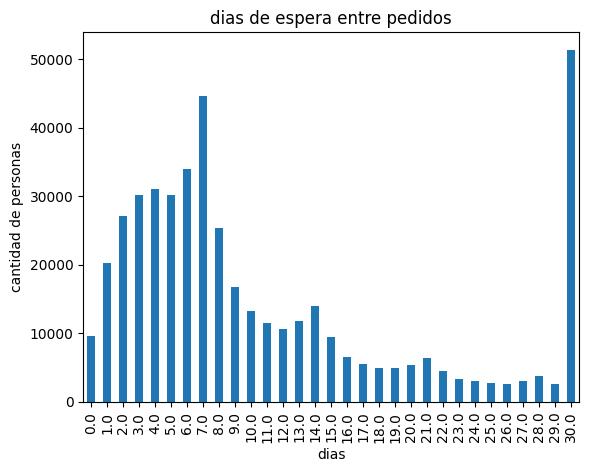

In [40]:
df_ordenes_tiempo=df_instacart_orders['days_since_prior_order'].value_counts().sort_index()
df_ordenes_tiempo.plot(kind='bar',title='dias de espera entre pedidos',xlabel='dias',ylabel='cantidad de personas')
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


los mayores valores son de 7 dias y de 30

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
df_instacart_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [42]:

df_instacart_orders_miercoles= df_instacart_orders[df_instacart_orders['order_dow']==3]
df_instacart_orders_miercoles=df_instacart_orders_miercoles['order_hour_of_day'].value_counts().sort_index()
df_instacart_orders_miercoles

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [43]:
df_instacart_orders_sabado= df_instacart_orders[df_instacart_orders['order_dow']==6]
df_instacart_orders_sabado=df_instacart_orders_sabado['order_hour_of_day'].value_counts().sort_index()
df_instacart_orders_sabado


0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

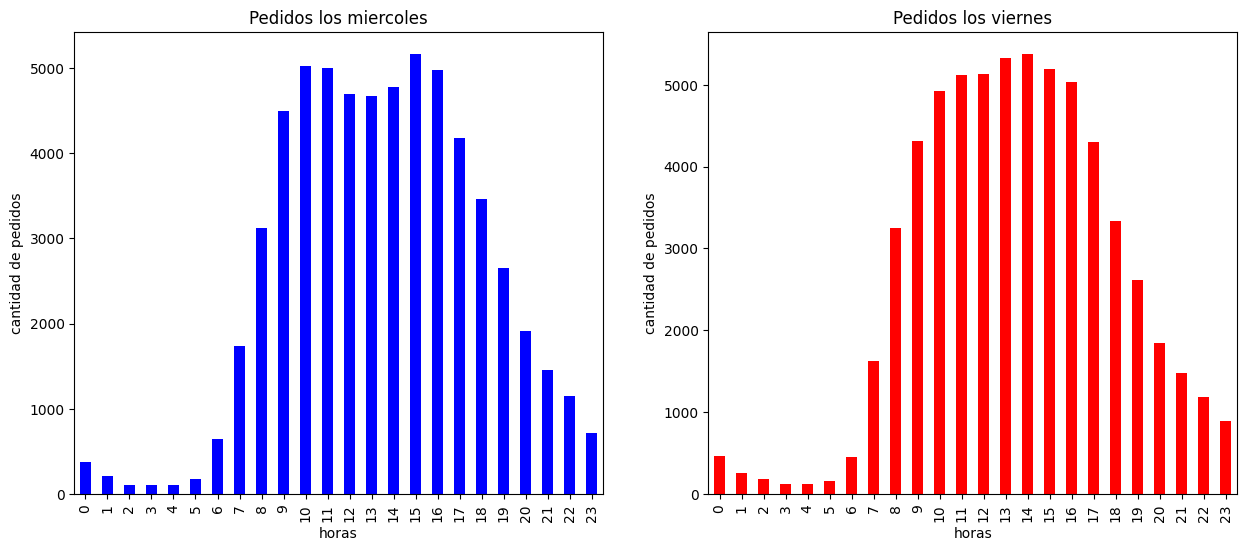

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(15,6))
df_instacart_orders_miercoles.plot(kind='bar',ax=ax1,title='Pedidos los miercoles',xlabel='horas', ylabel='cantidad de pedidos',color='blue')
df_instacart_orders_sabado.plot(kind='bar',ax=ax2,title='Pedidos los viernes',xlabel='horas', ylabel='cantidad de pedidos',color='red')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días, te dejo un ejemplo de como mostrarlos en una misma grafica
</div>


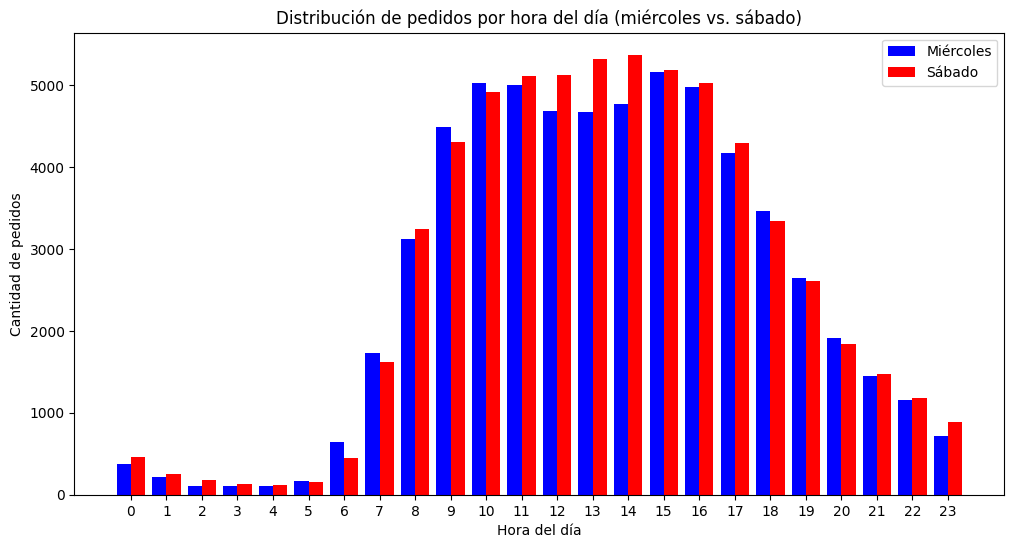

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(df_instacart_orders_miercoles.index - 0.2, df_instacart_orders_miercoles.values, width=0.4, label='Miércoles', color='blue')
plt.bar(df_instacart_orders_sabado.index + 0.2, df_instacart_orders_sabado.values, width=0.4, label='Sábado', color='red')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de pedidos por hora del día (miércoles vs. sábado)')
plt.xticks(range(24))
plt.legend()
plt.show()

los vierne se vende mejor que el miercoles en especial entre las 12 y 14 horas

In [45]:
df_instacart_orders_cliente= df_instacart_orders['user_id'].value_counts()
df_instacart_orders_cliente

149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64

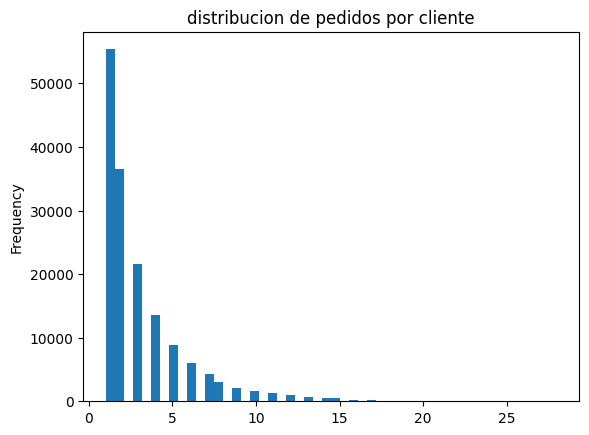

In [46]:

df_instacart_orders_cliente.plot(kind='hist',bins=50,title='distribucion de pedidos por cliente',ylabel='cantidad de pedidos',xlabel='cliente')
plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Cuidado! el titulo del ejercicio fue removido
</div>


Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [48]:

productos_mas_vendidos = df_order_products['product_id'].value_counts().head(20)
print(productos_mas_vendidos)


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [49]:
top_20_df = productos_mas_vendidos.reset_index()
top_20_df.columns = ['product_id', 'cantidad_vendida']
top_20_con_nombres = top_20_df.merge(df_products[['product_id', 'product_name']], on='product_id')
print(top_20_con_nombres)

    product_id  cantidad_vendida              product_name
0        24852             66050                    Banana
1        13176             53297    Bag of Organic Bananas
2        21137             37039      Organic Strawberries
3        21903             33971      Organic Baby Spinach
4        47209             29773      Organic Hass Avocado
5        47766             24689           Organic Avocado
6        47626             21495               Large Lemon
7        16797             20018              Strawberries
8        26209             19690                     Limes
9        27845             19600        Organic Whole Milk
10       27966             19197       Organic Raspberries
11       22935             15898      Organic Yellow Onion
12       24964             15292            Organic Garlic
13       45007             14584          Organic Zucchini
14       39275             13879       Organic Blueberries
15       49683             13675            Cucumber Kir

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son acertados!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
df_order_products_agrupado=df_order_products.groupby("order_id").count()
print(df_order_products_agrupado.head(10))


          product_id  add_to_cart_order  reordered
order_id                                          
4                 13                 13         13
9                 15                 15         15
11                 5                  5          5
19                 3                  3          3
20                 8                  8          8
31                10                 10         10
48                 8                  8          8
56                10                 10         10
61                12                 12         12
68                 9                  9          9


<AxesSubplot:title={'center':'Compras de articulo'}, ylabel='Frequency'>

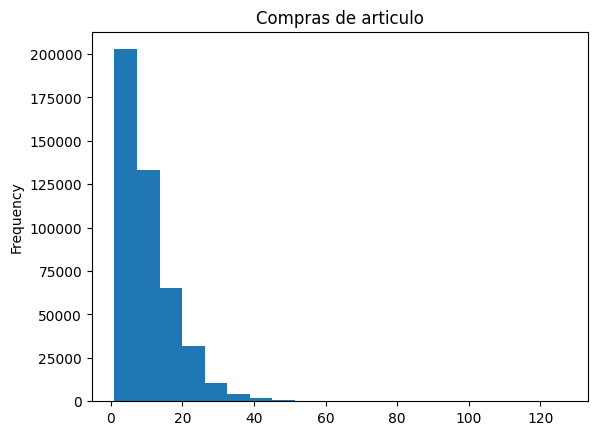

In [51]:
df_order_products_agrupado['product_id'].plot(kind='hist', bins=20,title='Compras de articulo',xlabel='product_id',ylabel='Clientes')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


la mayoria de personas compran pocos productos

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
productos_reordenados = df_order_products[df_order_products['reordered'] == 1]
print(productos_reordenados.head())

   order_id  product_id  add_to_cart_order  reordered
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1
5   2456893       21616                  4          1


In [53]:
top_20_reordenados = productos_reordenados.merge(df_products[['product_id', 'product_name']], on='product_id')
print(top_20_reordenados.head())

   order_id  product_id  add_to_cart_order  reordered product_name
0    567889        1560                  1          1   Bag Of Ice
1    761899        1560                  2          1   Bag Of Ice
2   1388514        1560                  8          1   Bag Of Ice
3   2629631        1560                  1          1   Bag Of Ice
4    866921        1560                  6          1   Bag Of Ice


In [54]:

top_20_reordenados_con_nombre = top_20_reordenados[['product_id','product_name']].value_counts().head(20)
print(top_20_reordenados_con_nombre)


product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:

total_pedidos_por_producto = df_order_products['product_id'].value_counts()
print(total_pedidos_por_producto.head())



24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
Name: product_id, dtype: int64


In [56]:
reordenaciones_por_producto = productos_reordenados['product_id'].value_counts()
print(reordenaciones_por_producto.head())

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
Name: product_id, dtype: int64


In [57]:

proporcion_por_producto = reordenaciones_por_producto/total_pedidos_por_producto
print(proporcion_por_producto.head())


1    0.564286
2         NaN
3    0.738095
4    0.510204
7    0.500000
Name: product_id, dtype: float64


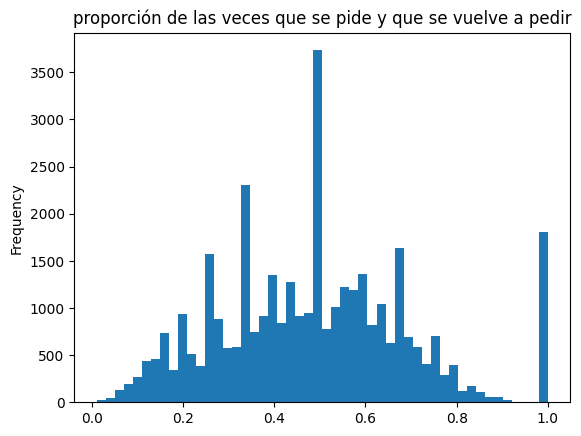

In [58]:

proporcion_por_producto.plot(kind='hist',bins=50,title='proporción de las veces que se pide y que se vuelve a pedir',ylabel='proporcion')
plt.show()



Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
df_order_products_con_cliente = df_order_products.merge(
    df_instacart_orders[['order_id', 'user_id']], 
    on='order_id'
)
print(df_order_products_con_cliente.head())

   order_id  product_id  add_to_cart_order  reordered  user_id
0   2141543       11440                 17          0    58454
1   2141543       31869                 15          1    58454
2   2141543       30233                  9          1    58454
3   2141543       27966                 20          1    58454
4   2141543       13176                  2          1    58454


In [60]:
total_productos_por_cliente = df_order_products_con_cliente.groupby('user_id').size()
print(total_productos_por_cliente.head())

user_id
2    26
4     2
5    12
6     4
7    14
dtype: int64


In [61]:

total_productos_reordenados_por_cliente = df_order_products_con_cliente.groupby('user_id')['reordered'].sum()
print(total_productos_reordenados_por_cliente)


user_id
2          1
4          0
5          8
6          0
7         13
          ..
206203     6
206206    15
206207    41
206208    87
206209     8
Name: reordered, Length: 149626, dtype: int64


In [62]:
proporcion_de_reordenamiento=total_productos_reordenados_por_cliente/total_productos_por_cliente
print(proporcion_de_reordenamiento)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Length: 149626, dtype: float64


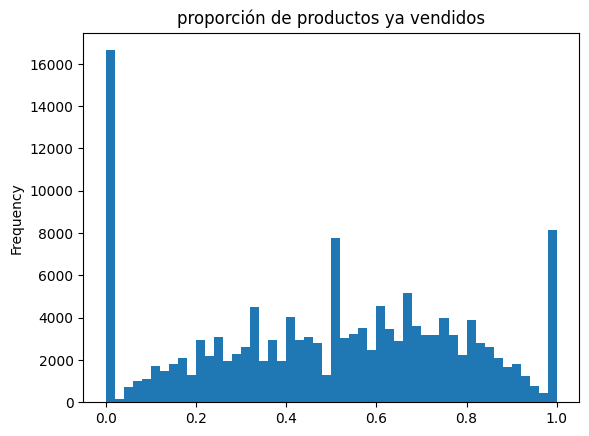

In [63]:
proporcion_de_reordenamiento.plot(kind='hist',bins=50,title='proporción de productos ya vendidos',ylabel='proporcion')
plt.show()


la mayoria pidio el producto por primera vez

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [64]:
productos_primeros = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [65]:
top_20_primeros = productos_primeros['product_id'].value_counts().head(20)

In [66]:
top_20_primeros_df = top_20_primeros.reset_index()
top_20_primeros_df.columns = ['product_id', 'veces_seleccionado_primero']

# Hacer merge con df_products para obtener los nombres
top_20_primeros_con_nombres = top_20_primeros_df.merge(
    df_products[['product_id', 'product_name']], 
    on='product_id'
)
print(top_20_primeros_con_nombres)

    product_id  veces_seleccionado_primero                 product_name
0        24852                       15562                       Banana
1        13176                       11026       Bag of Organic Bananas
2        27845                        4363           Organic Whole Milk
3        21137                        3946         Organic Strawberries
4        47209                        3390         Organic Hass Avocado
5        21903                        3336         Organic Baby Spinach
6        47766                        3044              Organic Avocado
7        19660                        2336                 Spring Water
8        16797                        2308                 Strawberries
9        27966                        2024          Organic Raspberries
10       44632                        1914   Sparkling Water Grapefruit
11       49235                        1797          Organic Half & Half
12       47626                        1737                  Larg

Escribe aquí tus conclusiones


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


### Conclusion general del proyecto:

In [ ]:
fue un proyecto muy complicado pero me siento satisfecho con haberlo logrado

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Desarrollar un poco más las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.

</div>